# PyTorch Data Preparation

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset

We will use this function in the lab to plot:

In [2]:
def show_data(data_sample, shape = (28,28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmp='gray')
    plt.title('y = ' + data_sample[1])

## Examine Files

In the prevoius lab, we create two lists; one to hold the path to the Negative files and one to hold the path to the Positive files. This process is shown in the following few lines of code.

We can obtain the list that contains the path to the negative files as follows:

In [56]:
directory = './resources/data'
negative = 'Negative'
negative_file_path=os.path.join(directory, negative)
negative_files = [os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['./resources/data/Negative/00001.jpg',
 './resources/data/Negative/00002.jpg',
 './resources/data/Negative/00003.jpg']

We can obtain the list that contains the path to the positive files as follows:

In [57]:
positive="Positive"
positive_file_path=os.path.join(directory,positive)
positive_files=[os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['./resources/data/Positive/00001.jpg',
 './resources/data/Positive/00002.jpg',
 './resources/data/Positive/00003.jpg']

## Question 1

Find the combined length of the list `positive_files` and `negative_files` using the `len` function. The assign it to the variable `number_of_samples`

In [5]:
number_of_samples = len(positive_files) + len(negative_files)
number_of_samples

40000

## Assign Labels to Images

In this section we will assign a lable to each image in this case we can assign the positive images , i.e. images with a crack to a value one and the negative images i.e images without a crack to a valie of zero. First we create a tensor or vector of zeros, each element corresponds to a new sample. The length of the tensor is equal to the number of samples.

In [6]:
Y = torch.zeros([number_of_samples])
Y

tensor([0., 0., 0.,  ..., 0., 0., 0.])

As we are using the tensor **Y** for classification we cast it to a `LongTensor`

In [7]:
Y = Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

With respect to each element we will set the even elements to class one and the odd elements to class zero

In [8]:
Y[::2] = 1
Y[1::2] = 0
Y

tensor([1, 0, 1,  ..., 0, 1, 0])

# Question 2 

Create a list all_files such that the even indexes contain the path to images with positive or cracked samples and the odd element contain the negative images or images with out cracks. Then use the following code to print out the first four samples.

In [9]:
all_files = []

samples = list(zip(positive_files , negative_files))

pairs = int(number_of_samples / 2)

for i in range(pairs):
    all_files.append(samples[i][0])
    all_files.append(samples[i][1])

all_files[0:3]
    
    

['./resources/data/Positive/00001.jpg',
 './resources/data/Negative/00001.jpg',
 './resources/data/Positive/00002.jpg']

code used to print samples:

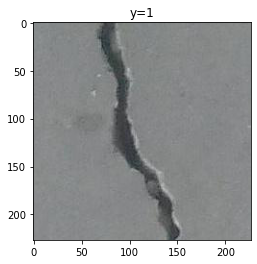

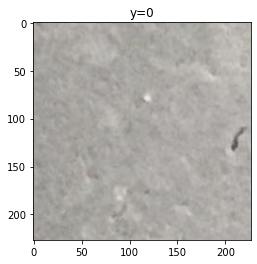

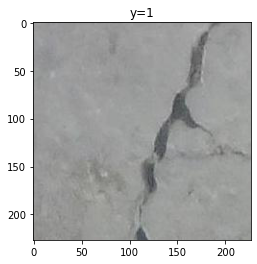

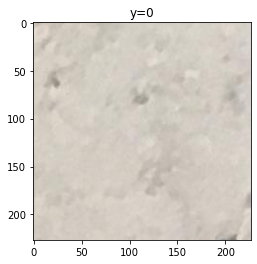

In [10]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title('y=' + str(y.item()))
    plt.show()

In [11]:
all_files=all_files[30000:]
Y=Y[30000:]

In [12]:
all_files[0:4]

['./resources/data/Positive/15001_1.jpg',
 './resources/data/Negative/15001.jpg',
 './resources/data/Positive/15002_1.jpg',
 './resources/data/Negative/15002.jpg']

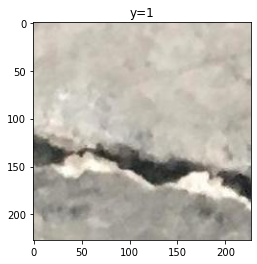

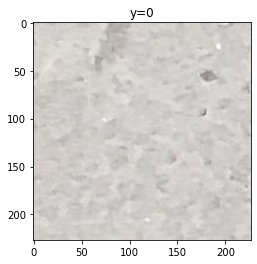

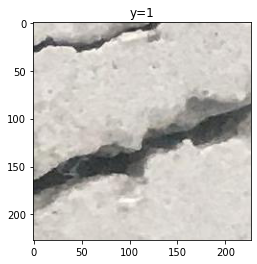

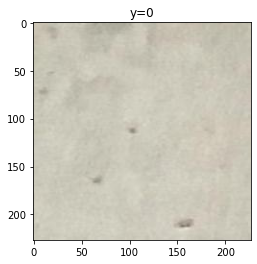

In [14]:
for y,file in zip(Y, all_files[0:4]):
    plt.imshow(Image.open(file))
    plt.title('y=' + str(y.item()))
    plt.show()

## Training and Vaildation Split

When training the model we split up our data into training and validation data. If the variable train is set to **True** the following lines of code will segment the tensor **Y** such that first 30000 samples are used for training. If the varaible train is set to False the remainder of the damples will be used for validation data.

In [15]:
train=False

if train:
    all_files=all_files[0:30000]
    Y=Y[0:30000]
else:
    all_files=all_files[30000:]
    Y=Y[30000:]

## Question 3

Modify the above lines of code such the if the variable **train** is set to **True**, the first 30000 samples of `all_files` are used in training. If **train** is set to **False** the remaining samples are used for validation. In both cases reassign the values to the variable all_files. then use the following lines of code to print out the first four validation sample images.

## Create a Dataset Class

In this section, we will use the previous code to build a dataset class
Complete the code to build a Dataset class `dataset`. As before, make sure the even samples are positive , and the odd samples are negative. If the parameter `train` is set to `True` use the first 30000 samples as training data; otherwise the remaining samples will be used as validation data.

In [58]:
class Dataset(Dataset):
    
    def __init__(self, transform=None, train=True):
        
        
        
        directory="./resources/data"
        positive="Positive"
        negative="Negative"
        
        positive_file_path=os.path.join(directory, positive)
        negative_file_path=os.path.join(directory, negative)
        
        positive_files=[os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        
        negative_files=[os.path.join(negative_file_path, file) for file in os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        
        self.all_files=[None] * number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files
        
        self.transform = transform
        
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0
        
        if train:
            self.Y = self.Y[0:30000]
            self.len=len(self.all_files)
        else:
            self.Y = self.Y[30000:]
            self.len = len(self.all_files)
            
    def __len__(self):
        return self.len
        
    def __getitem__(self, index):        
            
        image=Image.open(self.all_files[index])
        y=self.Y[index]
            
        if self.transform:
            image = self.transform(image)
            
        return image, y
        
        
        
        

## Question 4

Create a Data object `dataset` for the training data, use the following lines of code to print out sample the 10th and sample 100 (remember zero indexing)

In [42]:
dataset = Dataset()
dataset

In [38]:


for sample  in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("training data, sample {}".format(int(sample)))
    plt.show()
    

NotImplementedError: 

In [43]:
dataset[10]

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=227x227 at 0x7FC32B1D8EE0>,
 tensor(1))

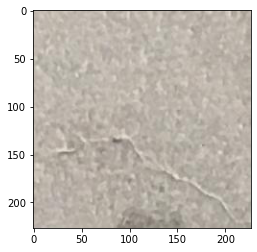

In [46]:
plt.imshow(dataset[9][0])

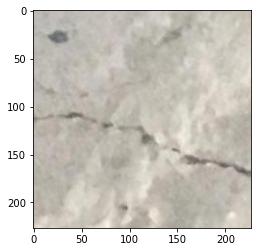

In [45]:
plt.imshow(dataset[100][0])

In [47]:
dataset2 = Dataset(train=False)

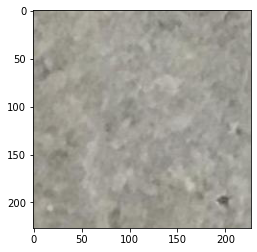

In [59]:
plt.imshow(dataset[15][0])

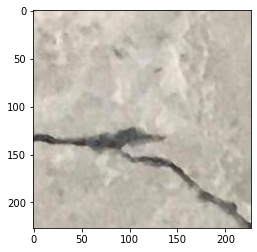

In [60]:
plt.imshow(dataset[102][0])